### Analysis of 60Co correlation data

In [1]:
import sys
sys.path.insert(0,'python/')
import struct
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Co60Analysis import *

#%load_ext snakeviz

#### Select the runs you wish to analyze

In [2]:
runs = ['C:/data/20220121_115544/']

#### Processing.....

1. instantiate the Co60Analysis class
2. loop over all the data

In [3]:
# 1....
myCo60 = Co60Analysis(runs=runs, dt_max=10)
# 2....
#%snakeviz 
myCo60.process_data(max_files=9999)

DT5550:: no data files specified.... re-initialize before use
Co60Analysis:: Begin processing data....
DT5550:: Data recorded with config:  C:/data/20220121_115544\config_20220121_115544.json
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_0.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_1.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_2.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_3.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_4.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_5.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_6.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_7.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_8.raw
DT5550:: Open data file: C:/data/20220121_115544\data_20220121_115544_9.raw
DT5550:: Open data file: C:/data/20220121_115544

#### Analyzing

1. calculate the rate corrections from the tags with the reference detector
2. tag and count events
3. fit the 4th order legendre polynomial to verify the $^{60}$Ni spin structure

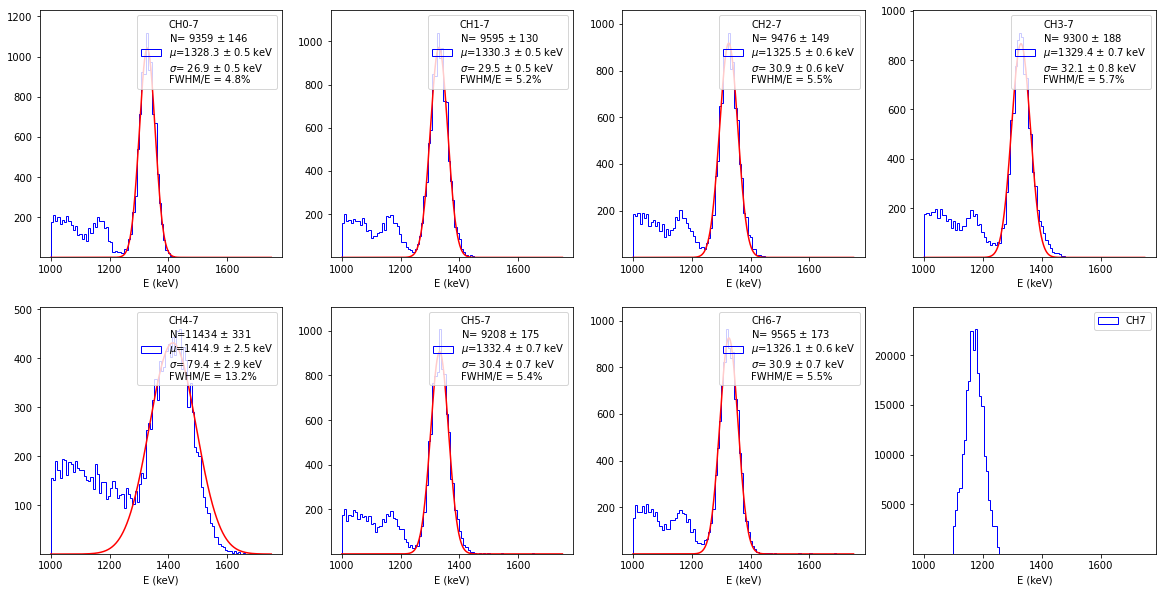

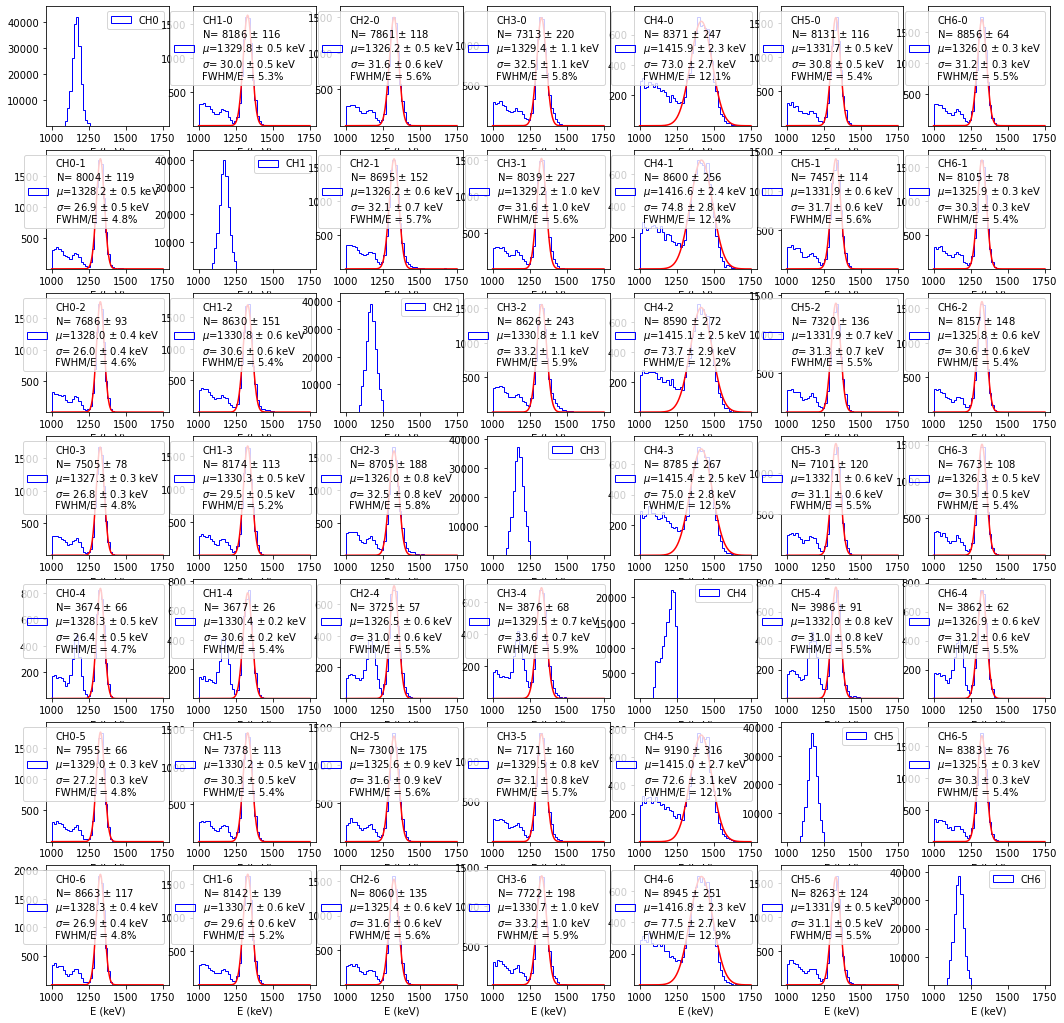

In [4]:
tag = '1173keV' # 1173keV # 1332keV
myCo60.dt_max = 10
# calculate the corrections
myCo60.calculate_corrections(tagged_peak=tag, range=(1000, 1750), bins=100)
# calculate the correlations
myCo60.rate_correction = np.ones(8)
myCo60.correlation_analysis(tagged_peak=tag, range=(1000,1750), bins=50)

[90.47386444 88.65976287 85.51581228 90.17044728 94.10720511 89.46639886
 93.2451134  89.65993099 86.35253424 90.02506755 87.6685961  92.89511156
 92.87806933 85.55991974 90.3188167  86.63003707 90.41117976 93.30021445
 84.26796516 87.59598975 89.1926782  85.89657199 85.43962418 84.68193733
 91.55840334 93.07476384 90.23074018 89.7798782  87.87673682 90.90055467]
[28.527326557633522, 44.55632073076433, 35.374220453330395, 66.1798264535468, 46.53991479272077, 60.45748350325993, 59.73299017786522]


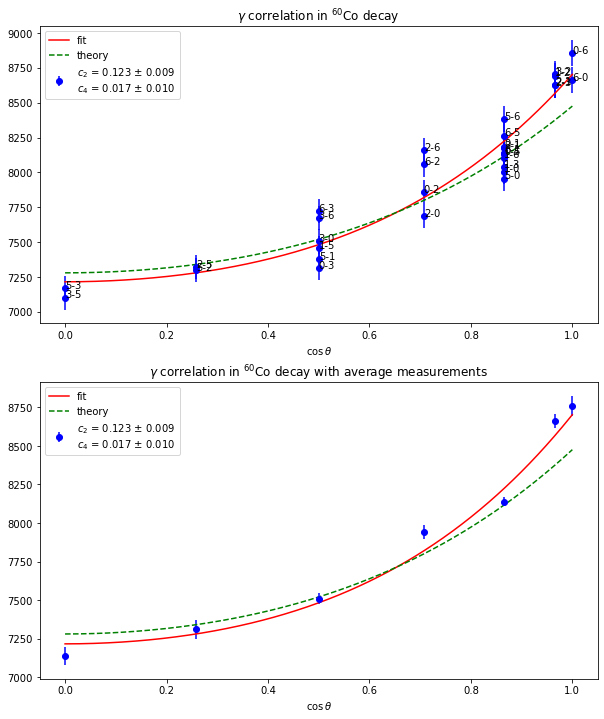

In [5]:
myCo60.correlation_fit()